**SVM MODEL**


The **kernel functions** are used to map the original dataset into a **higher dimensional space** with the view to make it a linear dataset. These kernels are different in case of making the **hyperplane decision boundary** between the classes.


Usually **linear** and **polynomial** kernels are less time consuming and provides less accuracy than the **RBF** or **Gaussian kernels**.


the **linear** kernel works fine if the dataset is linearly separable.


**RBF** uses normal curves around the data points, and sums these so that the decision boundary can be defined by a type of topology condition such as curves where the sum is above a value of 0.5. But, **polynomial** features are derived features from given features in the data set. We require more polynomial features if our dataset is complex, leading to slow model training as the feature increases. 

First, I normalize the data and split it to train and test sets, using sklearn library:

In [2]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("/Users/Nika/Desktop/q5.csv")
Xs = pd.DataFrame(data, columns=[" Mean of the integrated profile", " Standard deviation of the integrated profile", " Excess kurtosis of the integrated profile", " Skewness of the integrated profile", " Mean of the DM-SNR curve", " Standard deviation of the DM-SNR curve", " Excess kurtosis of the DM-SNR curve", " Skewness of the DM-SNR curve"])
ys = pd.DataFrame(data, columns=["target_class"])
X = np.asarray(Xs[[" Mean of the integrated profile", " Standard deviation of the integrated profile", " Excess kurtosis of the integrated profile", " Skewness of the integrated profile", " Mean of the DM-SNR curve", " Standard deviation of the DM-SNR curve", " Excess kurtosis of the DM-SNR curve", " Skewness of the DM-SNR curve"]])
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = np.asarray(ys["target_class"])

training_data, testing_data, training_labels, testing_labels = train_test_split(X,y)    

Then, I implement different SVM models, by fixing the kernel as **linear**, and changing the value of **C**.


kernel = linear , c = 1, 100, 1000

In [4]:
svm_clf = SVC(kernel="linear", C=1)
clf = svm_clf.fit(training_data, training_labels)
print("accuracy =",clf.score(testing_data,testing_labels))

accuracy = 0.9812290502793296


In [5]:
svm_clf = SVC(kernel="linear", C=100)
clf = svm_clf.fit(training_data, training_labels)
print("accuracy =",clf.score(testing_data,testing_labels))

accuracy = 0.9812290502793296


In [14]:
svm_clf = SVC(kernel="linear", C=1000)
clf = svm_clf.fit(training_data, training_labels)
print("accuracy =",clf.score(testing_data,testing_labels))

accuracy = 0.9812290502793296


Then, I implement different SVM models by fixing the kernel as **RBF**, and changing the value of **C**.


kernel = RBF , c = 1, 100, 1000

In [7]:
svm_clf = SVC(kernel="rbf", C=1)
clf = svm_clf.fit(training_data, training_labels)
print("accuracy =",clf.score(testing_data,testing_labels))

accuracy = 0.9722905027932961


In [8]:
svm_clf = SVC(kernel="rbf", C=100)
clf = svm_clf.fit(training_data, training_labels)
print("accuracy =",clf.score(testing_data,testing_labels))

accuracy = 0.9787709497206704


In [9]:
svm_clf = SVC(kernel="rbf", C=1000)
clf = svm_clf.fit(training_data, training_labels)
print("accuracy =",clf.score(testing_data,testing_labels))

accuracy = 0.980782122905028


Now, I implement different SVM models by fixing the kernel as **polynomial**, and changing the value of **C**.


kernel = polynomial , c = 1, 100

In [10]:
svm_clf = SVC(kernel="poly", C=1)
clf = svm_clf.fit(training_data, training_labels)
print("accuracy =",clf.score(testing_data,testing_labels))

accuracy = 0.9711731843575419


In [11]:
svm_clf = SVC(kernel="poly", C=100)
clf = svm_clf.fit(training_data, training_labels)
print("accuracy =",clf.score(testing_data,testing_labels))

accuracy = 0.9769832402234637


Setting the kernel as **sigmoid**, and changing the value of **C**:


kernel = sigmoid , c = 1, 100

In [12]:
svm_clf = SVC(kernel="sigmoid", C=1)
clf = svm_clf.fit(training_data, training_labels)
print("accuracy =",clf.score(testing_data,testing_labels))

accuracy = 0.9246927374301676


In [13]:
svm_clf = SVC(kernel="sigmoid", C=100)
clf = svm_clf.fit(training_data, training_labels)
print("accuracy =",clf.score(testing_data,testing_labels))

accuracy = 0.9217877094972067


As it can be seen from the above implementations, the accuracy of the **linear kernel** is higher than the other kernels, but different values of **'C'**, didn't have much effect on the accuracy of the linear kernels.


Now, I implement a **grid search** algorithm to optimize my SVM model weights:


Grid Search on Linear kernel:

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters = {'kernel': ['linear'], 'C':[1, 10, 100, 500], 'gamma': [0.9 ,0.7 ,0.5 ,0.3 ,0.1]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf = clf.fit(training_data, training_labels)
sorted(clf.cv_results_.keys())
print(clf.best_estimator_)
print(clf.best_score_)

SVC(C=10, gamma=0.9, kernel='linear')
0.9788423293286377


Grid Search on RBF kernel:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters = {'kernel': ['rbf'],'C':[1, 10, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf = clf.fit(training_data, training_labels)
sorted(clf.cv_results_.keys())
print(clf.best_estimator_)
print(clf.best_score_)

Grid Search on Polynomial kernel:

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters = {'kernel': ['poly'], 'degree': [2, 3, 4], 'C':[1, 10, 100, 500], 'gamma':[0.01, 0.03, 0.05]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf = clf.fit(training_data, training_labels)
sorted(clf.cv_results_.keys())
print(clf.best_estimator_)
print(clf.best_score_)

SVC(C=500, gamma=0.05, kernel='poly')
0.9776503009766128


As it can be seen in this part, the maximum accuracy belongs to the **RBF** kernel with C=10.

Now, I define a function for implementing the **confusion matrix**:

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,
                 i,
                 format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Plotting the confusion matrix for best estimator of part b:

[[4008   23]
 [  75  369]]


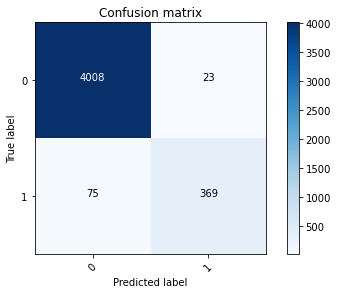

In [7]:
svm_clf = SVC(kernel="linear", C=1)
clf = svm_clf.fit(training_data, training_labels)
yhat = clf.predict(testing_data)
cnf_matrix = confusion_matrix(testing_labels, yhat)
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=['0', '1'],
                      normalize=False,
                      title='Confusion matrix')

Plotting the confusion matrix for best estimator of part c:

[[4007   24]
 [  73  371]]


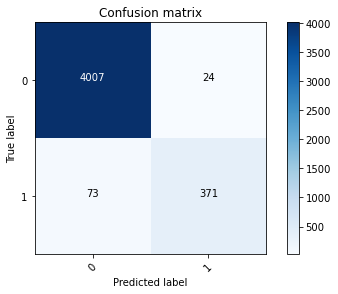

In [6]:
svm_clf = SVC(kernel="rbf", C=10)
clf = svm_clf.fit(training_data, training_labels)
yhat = clf.predict(testing_data)
cnf_matrix = confusion_matrix(testing_labels, yhat)
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=['0', '1'],
                      normalize=False,
                      title='Confusion matrix')

As it is shown in the results, the confusion matrices are very similar in these 2 cases, and the confusion matrix for the best estimator of part b, is a little bit better than that of part c. 